# Web application for x-ray images classification 

This project consists of the development of a web application that will allow the classification of an x_ray image using deep learning technique using labeled X-ray images available through the website of NIH. So the data consists of 100.000 images labeled with the disease diagnosis.

## Problem identification / targeted market

###### Health care is one the fields that took full advantage of the amazing progress in deep learning and specially in image recognition. This web application will provide a very useful tool for doctors to classify medical images: X-ray images of chest. This will allow a faster and cheaper diagnosis of an X-ray scan. This application can address real life problems in healthcare such as shortage of doctors and medical professionals. Also, giving the high price of consulating a doctor in developing countries, AI powered medical application such as the one developed in this project could help reduce the price of health care in developing countries.

In [197]:
!pip install keras

In [198]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
%matplotlib inline

In [199]:
data=pd.read_csv('Data_Entry_2017.csv')


In [200]:
data.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN


In [201]:
data.columns

Index(['Image Index', 'Finding Labels', 'Follow-up #', 'Patient ID',
       'Patient Age', 'Patient Gender', 'View Position', 'OriginalImage[Width',
       'Height]', 'OriginalImagePixelSpacing[x', 'y]', 'Unnamed: 11'],
      dtype='object')

The data contains the following features:
Image Index: serves as image Id
Finding Labels: integer 
patient ID
Patient Age
Patient Gender
View Position


In [202]:
Finding_labels_counts = data['Finding Labels'].value_counts()
Finding_labels_counts

No Finding                                                         60361
Infiltration                                                        9547
Atelectasis                                                         4215
Effusion                                                            3955
Nodule                                                              2705
Pneumothorax                                                        2194
Mass                                                                2139
Effusion|Infiltration                                               1603
Atelectasis|Infiltration                                            1350
Consolidation                                                       1310
Atelectasis|Effusion                                                1165
Pleural_Thickening                                                  1126
Cardiomegaly                                                        1093
Emphysema                                          

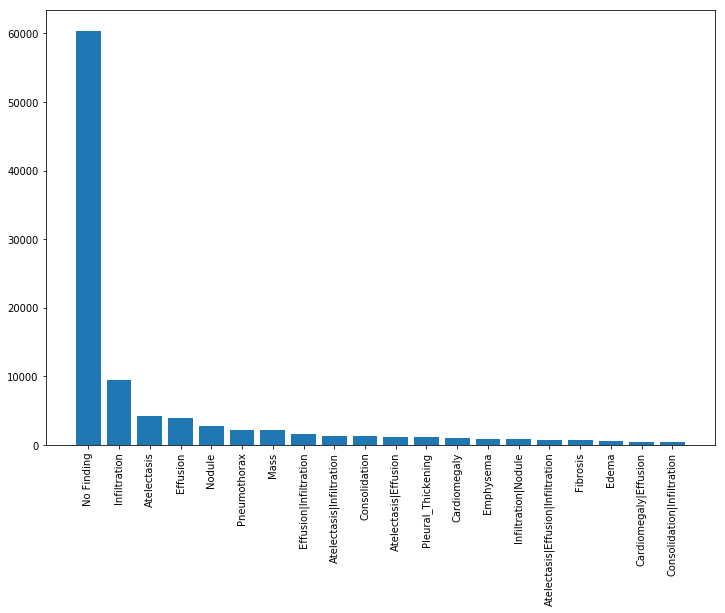

In [203]:
fig, ax1 = plt.subplots(1,1,figsize = (12, 8))
ax1.bar(np.arange(len(Finding_labels_counts[:20]))+0.5, Finding_labels_counts[:20])
ax1.set_xticks(np.arange(len(Finding_labels_counts[:20]))+0.5)
_ = ax1.set_xticklabels(Finding_labels_counts[:20].index, rotation = 90)

The Finding label will be the target value for the algorithm. Notice that the data is imbalanced toward No finding. Also, a great number of finding labels with few frequency (number of occurrence). We have to clean this dataset and eliminate the examples with "rare" finding label. To better visualize the distribution of data into different diseases, I drop the "No finding" category.

In [204]:
short_labels=Finding_labels_counts.drop(labels=['No Finding'])

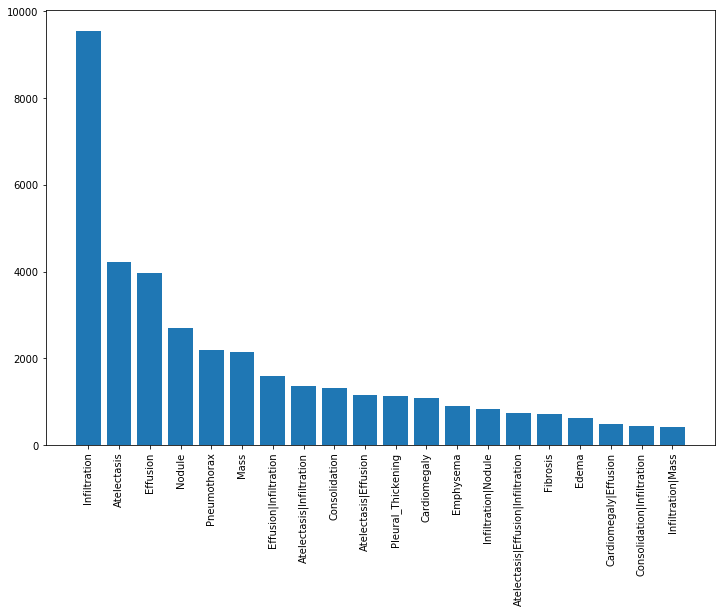

In [205]:
fig, ax1 = plt.subplots(1,1,figsize = (12, 8))
ax1.bar(np.arange(len(short_labels[:20]))+0.5, short_labels[:20])
ax1.set_xticks(np.arange(len(short_labels[:20]))+0.5)
_ = ax1.set_xticklabels(short_labels[:20].index, rotation = 90)

fig.savefig('test1.png')

In [206]:
data.rename(columns={'Image_Index':'Image_Index','Finding Labels' :'Finding_Labels'}, inplace=True)

Infiltration is the most commen

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f66a497ad30>]],
      dtype=object)

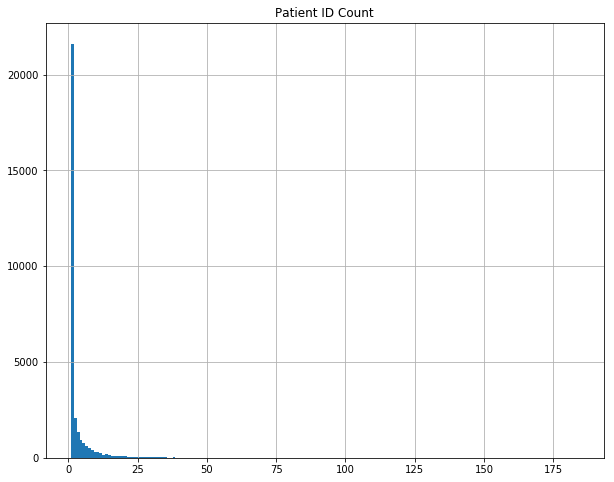

In [207]:
follow_ups = data[[ 'Patient ID' ]]
patient_follow_ups = follow_ups.groupby([ 'Patient ID' ])
grouped_df = patient_follow_ups.apply(lambda c: c.count()).add_suffix(' Count')
grouped_df.hist(column="Patient ID Count",bins=180,figsize=(10,8),label="Number of Follow-Ups per patient")

In [208]:
# create 6 subsets with the data from the 6 most frequent diseases:
data_infiltration =data.loc[data['Finding_Labels']=='Infiltration', :]
data_Atelectasis = data.loc[data['Finding_Labels']=='Atelectasis', :]
data_Effusion  = data.loc[data['Finding_Labels']=='Effusion', :]
data_Nodule = data.loc[data['Finding_Labels']=='Nodule', :]
data_Pneumothorax = data.loc[data['Finding_Labels']=='Pneumothorax', :]
data_Mass  = data.loc[data['Finding_Labels']=='Mass', :]


In [209]:
import tarfile
tf = tarfile.open("images_001/images_001.tar")
tf.extractall()



FileNotFoundError: [Errno 2] No such file or directory: 'images_001/images_001.tar'

In [210]:
image_infiltration = plt.imread('images/00000005_006.png')
image_Atelectasis= plt.imread('images/00000032_012.png')
image_Effusion= plt.imread('images/00000017_000.png')
image_Nodule= plt.imread('images/00000021_000.png')
image_Pneumothorax= plt.imread('images/00000061_015.png')
image__Mass= plt.imread('images/00000013_024.png')


In [211]:
image_infiltration

array([[0.03529412, 0.03137255, 0.02745098, ..., 0.02352941, 0.01568628,
        0.        ],
       [0.03529412, 0.03137255, 0.03137255, ..., 0.02352941, 0.01568628,
        0.        ],
       [0.03529412, 0.03137255, 0.02745098, ..., 0.02352941, 0.01568628,
        0.        ],
       ...,
       [0.58431375, 0.58431375, 0.57254905, ..., 0.20784314, 0.20784314,
        0.12156863],
       [0.6509804 , 0.654902  , 0.64705884, ..., 0.22745098, 0.23529412,
        0.14901961],
       [0.73333335, 0.72156864, 0.72156864, ..., 0.25882354, 0.2627451 ,
        0.16470589]], dtype=float32)

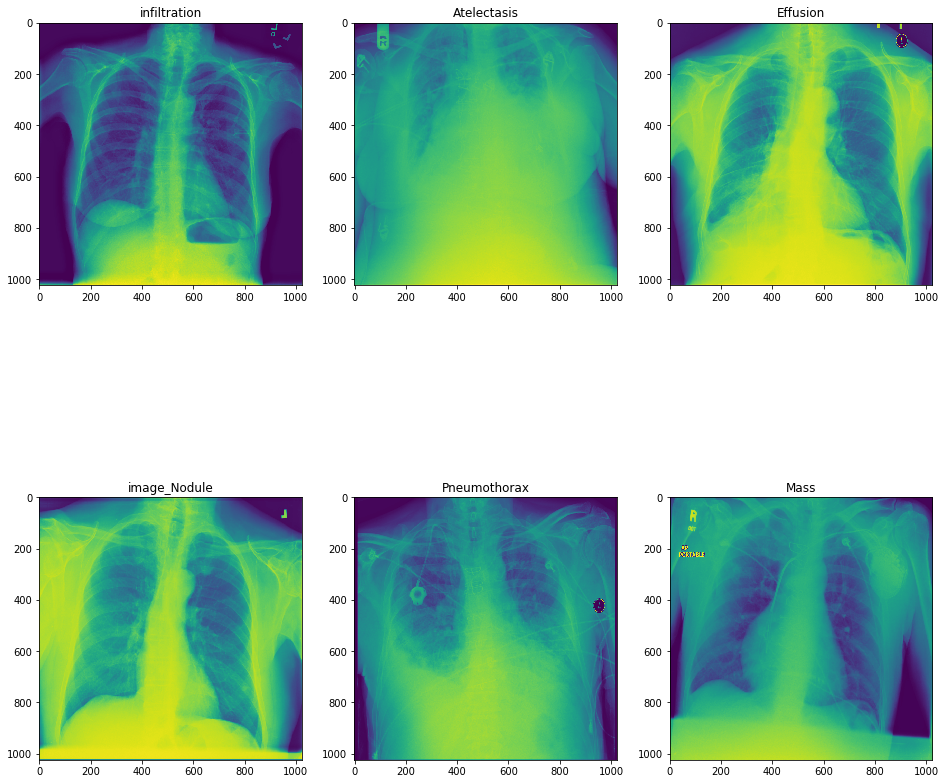

In [212]:
fig, axe = plt.subplots(2,3, figsize = (16, 16))
axe[0,0].set_title('infiltration')
axe[0,0].imshow(image_infiltration)
axe[0,1].set_title('Atelectasis')
axe[0,1].imshow(image_Atelectasis)
axe[0,2].set_title('Effusion')
axe[0,2].imshow(image_Effusion)
axe[1,0].set_title('image_Nodule')
axe[1,0].imshow(image_Nodule)
axe[1,1].set_title('Pneumothorax')
axe[1,1].imshow(image_Pneumothorax)
axe[1,2].set_title('Mass')
axe[1,2].imshow(image__Mass)
plt.show()

fig.savefig('test.png')


The feature 'View Position' has two possibile value "PA" and "AP" in what follows I am going to compare images from the two positions (all other parameters are the same)

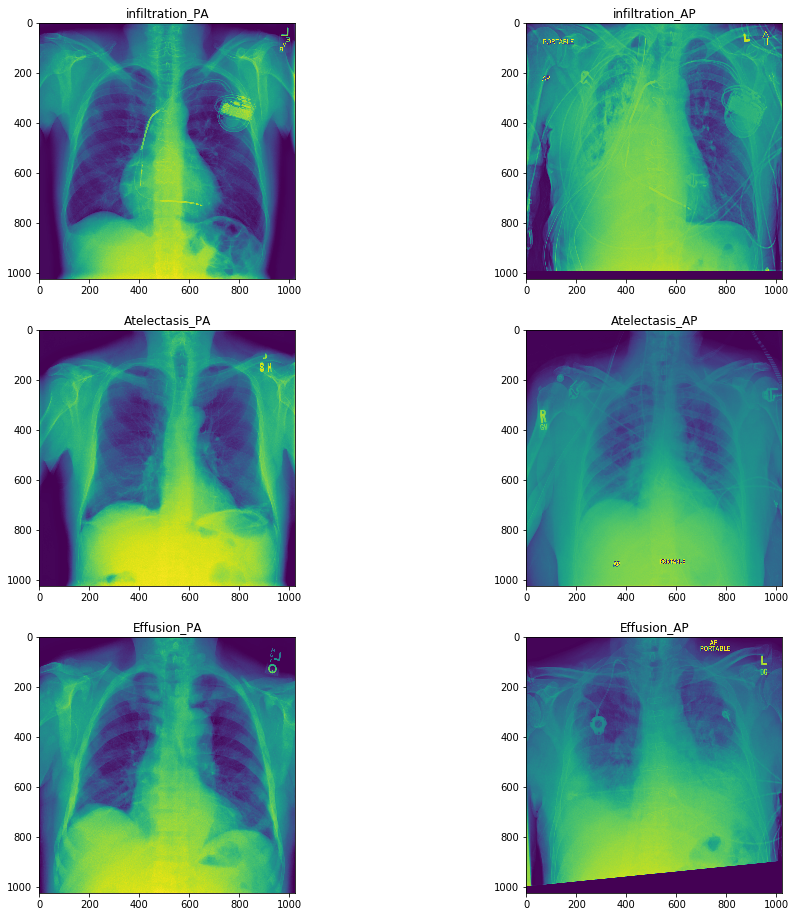

In [213]:
image_infiltration_AP = plt.imread('images/00000013_007.png')
image_infiltration_PA= plt.imread('images/00000013_022.png')
image_Atelectasis_AP=plt.imread('images/00000047_003.png')
image_Atelectasis_PA=plt.imread('images/00000030_000.png')
image_Effusion_AP=plt.imread('images/00000061_011.png')
image_Effusion_PA=plt.imread('images/00000011_000.png')

fig, axe = plt.subplots(3,2, figsize = (16, 16))
axe[0,0].set_title('infiltration_PA')
axe[0,0].imshow(image_infiltration_PA)
axe[0,1].set_title('infiltration_AP')
axe[0,1].imshow(image_infiltration_AP)
axe[1,0].set_title('Atelectasis_PA')
axe[1,0].imshow(image_Atelectasis_PA)
axe[1,1].set_title('Atelectasis_AP')
axe[1,1].imshow(image_Atelectasis_AP)
axe[2,1].set_title('Effusion_AP')
axe[2,1].imshow(image_Effusion_AP)
axe[2,0].set_title('Effusion_PA')
axe[2,0].imshow(image_Effusion_PA)


A clear difference in the intensity between AP and PA positions. This should be taken into account when using this data to train the CNN model.

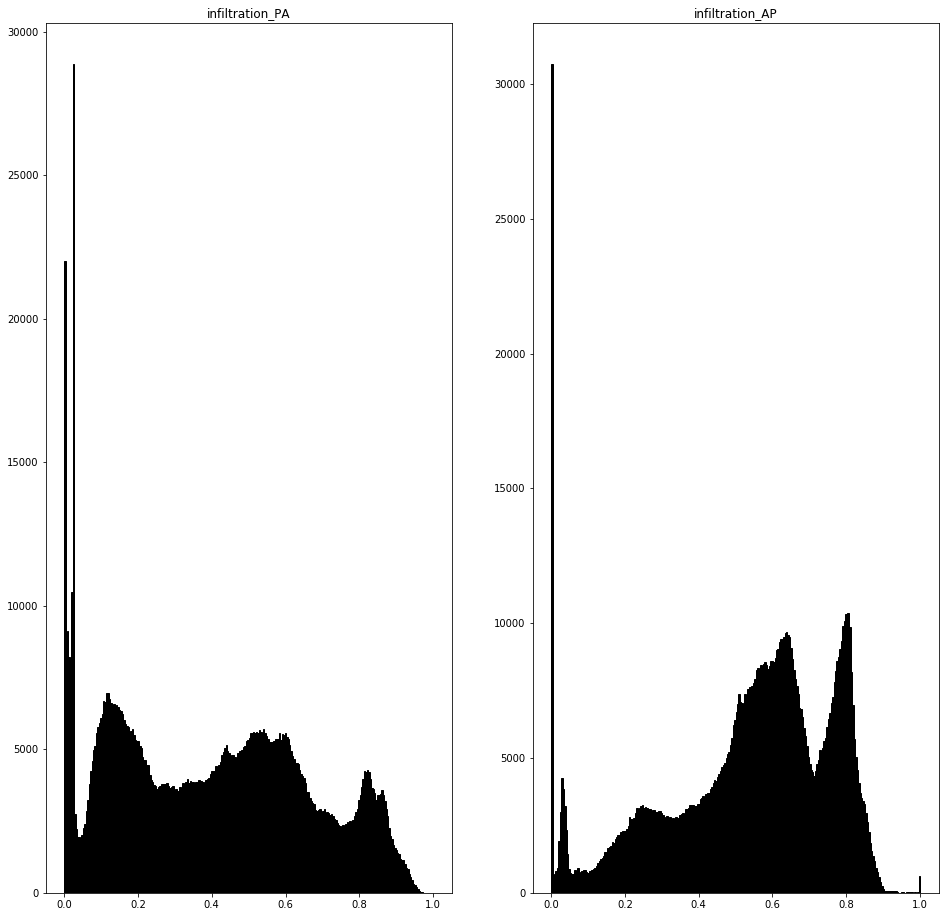

In [214]:
fig, axe = plt.subplots(1,2, figsize = (16, 16))
axe[0].set_title('infiltration_PA')
axe[0].hist(image_infiltration_PA.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')
axe[1].set_title('infiltration_AP')
axe[1].hist(image_infiltration_AP.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')
plt.show()

The histograms of AP and PA positions confirm the observation above

In [215]:
data.head()

,Image Index,Finding_Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN


In [216]:
import scipy.ndimage
height, width = scipy.ndimage.imread('images/00000013_007.png').shape
print(height, width)

1024 1024


/opt/conda/envs/data3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  


As a first test I am going to use only 5000 images from the total 112.000 images (around 5 % of the data)

# Preparation of the training data

The finding labels column consists of 13 different disease in addition to No Finding label corresponding to normal X-ray  showing no disease signs. As a first step I want to train a model to identify if an X-Ray corresponds to a sick person or healthy person without more identification of the type of sickness. The Finding Labels column will be replaced by  binary value 0/1 for sick/healty labels.   

In [217]:
data['IsSick'] = np.random.randn()

In [218]:
data=data.drop(['IsSick'], axis=1)

In [219]:
Serie_IsSick=[]
for index, row in data.iterrows():
    if row['Finding_Labels']=='No Finding':
        Serie_IsSick.append(0)
    else: 
        Serie_IsSick.append(1)
        
        


In [220]:
data.insert(1,'IsSick',Serie_IsSick)

In [221]:
short_data=data.iloc[0:5000, :]

In [222]:
from sklearn.model_selection import train_test_split
train_df, valid_df = train_test_split(short_data, 
                                   test_size = 0.2, 
                                   random_state = 46,
                                   stratify = short_data['IsSick'])
print('train', train_df.shape[0], 'validation', valid_df.shape[0])



train 4000 validation 1000


In [261]:
valid_df

,Image Index,IsSick,Finding_Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
1654,00000450_003.png,0,No Finding,3,450,62,F,AP,3056,2544,0.139000,0.139000,NaN
3281,00000870_004.png,1,Effusion,4,870,76,M,AP,3056,2544,0.139000,0.139000,NaN
3194,00000834_000.png,0,No Finding,0,834,67,M,PA,2992,2991,0.143000,0.143000,NaN
2293,00000591_002.png,1,Effusion,2,591,63,M,PA,2500,2048,0.168000,0.168000,NaN
848,00000211_002.png,1,Cardiomegaly,2,211,56,F,AP,2500,2048,0.168000,0.168000,NaN
2988,00000798_000.png,0,No Finding,0,798,61,F,PA,2048,2500,0.168000,0.168000,NaN
3209,00000845_001.png,1,Cardiomegaly|Effusion,1,845,67,F,PA,2021,2021,0.194311,0.194311,NaN
2169,00000571_004.png,1,Infiltration,4,571,49,M,PA,2844,2457,0.143000,0.143000,NaN
4215,00001150_000.png,0,No Finding,0,1150,73,F,PA,2500,2048,0.168000,0.168000,NaN
3128,00000824_000.png,0,No Finding,0,824,35,M,PA,2500,2048,0.168000,0.168000,NaN


# Image preparation for CNN classifier 

In [224]:
from keras.preprocessing.image import ImageDataGenerator
IMG_SIZE = (128, 128)
data_gen = ImageDataGenerator()

In [225]:
from shutil import copyfile

In [226]:
image_ID_valid_sick=[]
image_ID_train_sick=[]
image_ID_valid_nosick=[]
image_ID_train_nosick=[]


In [227]:
for index, row in valid_df.iterrows():
    if row["IsSick"]==1:
        image_ID_valid_sick.append(row['Image Index'])
    else:
        image_ID_valid_nosick.append(row['Image Index'])

In [228]:

for index, row in train_df.iterrows():
    if row["IsSick"]==1:
        image_ID_train_sick.append(row['Image Index'])
    else:
        image_ID_train_nosick.append(row['Image Index'])
image_ID_train_nosick


['00001190_001.png',
 '00000181_063.png',
 '00000704_001.png',
 '00001129_001.png',
 '00000963_021.png',
 '00001006_012.png',
 '00001101_001.png',
 '00000892_001.png',
 '00000248_003.png',
 '00001248_001.png',
 '00001181_000.png',
 '00001170_014.png',
 '00001059_001.png',
 '00000151_002.png',
 '00000310_002.png',
 '00001221_003.png',
 '00000495_000.png',
 '00000938_000.png',
 '00001253_003.png',
 '00001084_001.png',
 '00001288_000.png',
 '00000964_000.png',
 '00000468_021.png',
 '00000359_010.png',
 '00000356_000.png',
 '00001107_005.png',
 '00000426_002.png',
 '00000278_002.png',
 '00001118_000.png',
 '00000549_000.png',
 '00000947_001.png',
 '00000190_000.png',
 '00000752_001.png',
 '00000877_011.png',
 '00000918_000.png',
 '00000162_000.png',
 '00000475_000.png',
 '00000531_001.png',
 '00001213_003.png',
 '00000321_004.png',
 '00000860_001.png',
 '00000500_001.png',
 '00000468_030.png',
 '00001232_006.png',
 '00000468_042.png',
 '00001304_007.png',
 '00001336_000.png',
 '00000500_00

In [229]:
for i in range (len(image_ID_valid_sick)):
    str1='images/'+ image_ID_valid_sick[i]
    str2='images/valid/sick/'+image_ID_valid_sick[i]
    copyfile(str1, str2 ) 

FileNotFoundError: [Errno 2] No such file or directory: 'images/00000322_011.png'

In [230]:
for i in range (len(image_ID_valid_nosick)):
    str1='images/'+ image_ID_valid_nosick[i]
    str2='images/valid/nosick/'+image_ID_valid_nosick[i]
    copyfile(str1, str2)

FileNotFoundError: [Errno 2] No such file or directory: 'images/00001048_002.png'

In [33]:
for i in range (len(image_ID_train_sick)):
    str1='images/'+ image_ID_train_sick[i]
    str2='images/train/sick/'+image_ID_train_sick[i]
    copyfile(str1, str2 ) 

In [34]:
for i in range (len(image_ID_train_nosick)):
    str1='images/'+ image_ID_train_nosick[i]
    str2='images/train/nosick/'+image_ID_train_nosick[i]
    copyfile(str1, str2 ) 

In [263]:
train_path="images/train/"
valid_path="images/valid/"
test_path="images/test/"

In [232]:
train_batches = data_gen.flow_from_directory(train_path, target_size=(128,128), classes=['sick', 'nosick'], batch_size=100, color_mode = 'grayscale')
valid_batches = data_gen.flow_from_directory(valid_path, target_size=(128,128), classes=['sick', 'nosick'], batch_size=25, color_mode = 'grayscale')

Found 4374 images belonging to 2 classes.
Found 1376 images belonging to 2 classes.


In [233]:
imgs, labels = next(train_batches)

In [264]:
test_batches = data_gen.flow_from_directory(test_path, target_size=(128,128), classes=['sick', 'nosick'], batch_size=42, color_mode = 'grayscale')

Found 42 images belonging to 2 classes.


# Build and train a CNN

In [235]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.layers.convolutional import *
from keras.layers.normalization import BatchNormalization
from keras.applications.mobilenet import MobileNet
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten


In [236]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,1)),
    Conv2D(32, (3,3), activation='relu'),
    Conv2D(32, (3,3), activation='relu'),
    Conv2D(32, (3,3), activation='relu'),
    Conv2D(32, (3,3), activation='relu'),
    

    Flatten(),
    Dense(2, activation='sigmoid'),
         
])

In [237]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                           metrics = ['binary_accuracy', 'mae'])


In [238]:
model.fit_generator(train_batches, steps_per_epoch=20, validation_data=valid_batches, validation_steps=10, epochs=10, verbose=2)

Epoch 1/10
 - 66s - loss: 48.9867 - binary_accuracy: 0.5320 - mae: 0.4698 - val_loss: 1.2468 - val_binary_accuracy: 0.5620 - val_mae: 0.4555
Epoch 2/10
 - 64s - loss: 0.9238 - binary_accuracy: 0.5626 - mae: 0.4621 - val_loss: 0.6709 - val_binary_accuracy: 0.5200 - val_mae: 0.4952
Epoch 3/10
 - 63s - loss: 0.6998 - binary_accuracy: 0.5182 - mae: 0.4980 - val_loss: 0.6848 - val_binary_accuracy: 0.5320 - val_mae: 0.4955
Epoch 4/10
 - 65s - loss: 0.6852 - binary_accuracy: 0.5633 - mae: 0.4930 - val_loss: 0.6574 - val_binary_accuracy: 0.5840 - val_mae: 0.4862
Epoch 5/10
 - 64s - loss: 0.6621 - binary_accuracy: 0.6155 - mae: 0.4769 - val_loss: 0.6264 - val_binary_accuracy: 0.6120 - val_mae: 0.4681
Epoch 6/10
 - 65s - loss: 0.6401 - binary_accuracy: 0.6375 - mae: 0.4562 - val_loss: 0.5396 - val_binary_accuracy: 0.6681 - val_mae: 0.4472
Epoch 7/10
 - 63s - loss: 0.6167 - binary_accuracy: 0.6626 - mae: 0.4419 - val_loss: 0.6000 - val_binary_accuracy: 0.6700 - val_mae: 0.4414
Epoch 8/10
 - 64s -

In [239]:
model2 = Sequential([
    Conv2D(32, (4,4), activation='relu', input_shape=(128,128,1)),
    Conv2D(32, (4,4), activation='relu'),
    Conv2D(32, (4,4), activation='relu'),
    Conv2D(32, (4,4), activation='relu'),
    Conv2D(32, (4,4), activation='relu'),

    

    Flatten(),
    Dense(2, activation='sigmoid'),
         
])

In [240]:
model2.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                           metrics = ['binary_accuracy', 'mae'])

In [241]:
model2.fit_generator(train_batches, steps_per_epoch=30, validation_data=valid_batches, validation_steps=10, epochs=10, verbose=2)

Epoch 1/10
 - 163s - loss: 64.9125 - binary_accuracy: 0.5069 - mae: 0.4954 - val_loss: 14.4688 - val_binary_accuracy: 0.5000 - val_mae: 0.5000
Epoch 2/10
 - 159s - loss: 1.4476 - binary_accuracy: 0.5060 - mae: 0.4959 - val_loss: 0.6904 - val_binary_accuracy: 0.5100 - val_mae: 0.4998
Epoch 3/10
 - 157s - loss: 0.6928 - binary_accuracy: 0.5118 - mae: 0.4998 - val_loss: 0.6905 - val_binary_accuracy: 0.4860 - val_mae: 0.5000
Epoch 4/10
 - 161s - loss: 0.6909 - binary_accuracy: 0.5427 - mae: 0.4985 - val_loss: 0.6885 - val_binary_accuracy: 0.5600 - val_mae: 0.4989
Epoch 5/10
 - 158s - loss: 0.6878 - binary_accuracy: 0.5567 - mae: 0.4962 - val_loss: 0.6956 - val_binary_accuracy: 0.5640 - val_mae: 0.4953
Epoch 6/10
 - 160s - loss: 0.6835 - binary_accuracy: 0.5770 - mae: 0.4930 - val_loss: 0.6813 - val_binary_accuracy: 0.5819 - val_mae: 0.4893
Epoch 7/10
 - 161s - loss: 0.6748 - binary_accuracy: 0.5915 - mae: 0.4861 - val_loss: 0.6458 - val_binary_accuracy: 0.6100 - val_mae: 0.4794
Epoch 8/10


In [246]:
model3 = Sequential([
    Conv2D(32, (2,2), activation='relu', input_shape=(128,128,1)),
    Conv2D(32, (2,2), activation='relu'),
    Conv2D(32, (2,2), activation='relu'),
    Conv2D(32, (2,2), activation='relu'),
    Conv2D(32, (2,2), activation='relu'),

    

    Flatten(),
    Dense(2, activation='sigmoid'),
         
])

In [247]:
model3.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                           metrics = ['binary_accuracy', 'mae'])

In [248]:
model3.fit_generator(train_batches, steps_per_epoch=30, validation_data=valid_batches, validation_steps=15, epochs=10, verbose=2)

Epoch 1/10
 - 63s - loss: 58.6122 - binary_accuracy: 0.5141 - mae: 0.4855 - val_loss: 1.2788 - val_binary_accuracy: 0.5293 - val_mae: 0.4685
Epoch 2/10
 - 63s - loss: 0.7627 - binary_accuracy: 0.5518 - mae: 0.4844 - val_loss: 0.6223 - val_binary_accuracy: 0.6293 - val_mae: 0.4662
Epoch 3/10
 - 64s - loss: 0.6379 - binary_accuracy: 0.6463 - mae: 0.4545 - val_loss: 0.5418 - val_binary_accuracy: 0.6573 - val_mae: 0.4315
Epoch 4/10
 - 60s - loss: 0.4954 - binary_accuracy: 0.7757 - mae: 0.3630 - val_loss: 0.5674 - val_binary_accuracy: 0.7735 - val_mae: 0.3565
Epoch 5/10
 - 57s - loss: 0.3556 - binary_accuracy: 0.8623 - mae: 0.2639 - val_loss: 0.5355 - val_binary_accuracy: 0.7640 - val_mae: 0.2973
Epoch 6/10
 - 59s - loss: 0.2660 - binary_accuracy: 0.9085 - mae: 0.2012 - val_loss: 0.4694 - val_binary_accuracy: 0.8053 - val_mae: 0.2547
Epoch 7/10
 - 57s - loss: 0.1327 - binary_accuracy: 0.9682 - mae: 0.1080 - val_loss: 0.2692 - val_binary_accuracy: 0.8093 - val_mae: 0.2249
Epoch 8/10
 - 59s -

In [249]:
model3.save('model_binary_NIH.h5')

In [265]:
test_imgs, test_labels = next(test_batches)

In [266]:
predictions=model3.predict_classes(test_imgs, verbose=0)

In [267]:
predictions

array([1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0])

In [268]:
from sklearn.metrics import confusion_matrix

In [269]:
import itertools
from itertools import product
def plot_confusion_matrix(cm, classes=[0.1],
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = [0,1]
    plt.xticks(tick_marks, [0,1], rotation=45)
    plt.yticks(tick_marks, [0,1])


    print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, cm[i,j], horizontalalignment = "center", color = "white" if cm[i,j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel('Predicted label')
        

In [270]:
cm_plot_labels=['sick, nosick']

In [297]:
test_labels_=[]
for i in range (len(test_labels)):
    test_labels_.append(test_labels[i][1])


In [298]:
test_batches.class_indices

{'sick': 0, 'nosick': 1}

In [299]:
cm = confusion_matrix(test_labels_, predictions)

Confusion matrix, without normalization
[[ 9  7]
 [ 7 19]]


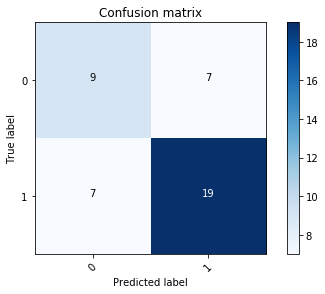

In [300]:
plot_confusion_matrix(cm, predictions, cm_plot_labels, title='Confusion matrix')

In [196]:
type(model3)

keras.engine.sequential.Sequential